In [111]:
def get_metrics(input_file):
#     print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics=[]
    split_title = input_file.split("_")
    metrics.extend([float(split_title[4]), float(split_title[6])])
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[0]].append(metrics)

In [127]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np

defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(list)
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

In [128]:
all_metrics

defaultdict(list,
            {'stack16': [[3.75, 1000.0, 24917.23, -0.02343, 5.9],
              [2.75, 3000.0, 24883.69, -0.02088, 5.5],
              [7.0, 3000.0, 24885.15, -0.02548, 6.1],
              [4.75, 50.0, 24891.2, -0.0252, 6.1],
              [5.5, 2000.0, 24888.99, -0.0253, 6.1],
              [4.25, 1500.0, 24922.39, -0.0242, 5.9],
              [7.5, 1000.0, 24885.96, -0.02543, 6.1],
              [6.0, 1000.0, 24895.03, -0.02541, 6.1],
              [6.5, 50.0, 24886.47, -0.02543, 6.1],
              [4.25, 1250.0, 24922.19, -0.02428, 5.9],
              [1.25, 2500.0, 24861.84, -0.02097, 5.5],
              [10.0, 250.0, 24889.88, -0.02527, 6.1],
              [6.0, 2000.0, 24887.41, -0.02541, 6.1],
              [3.75, 2000.0, 24914.58, -0.02304, 5.9],
              [1.5, 750.0, 24852.83, -0.02124, 5.5],
              [4.25, 250.0, 24895.25, -0.02478, 6.0],
              [6.5, 3000.0, 24889.34, -0.02545, 6.1],
              [1.5, 50.0, 24856.8, -0.02156, 5.5],
    

In [138]:
stack = 'stack16'
stack_metrics=np.array(all_metrics[stack])
hard_threshold_mul = sorted(set(stack_metrics.T[0]))
print(hard_threshold_mul)

bfactors = sorted(set(stack_metrics.T[1]))
print(bfactors)


[0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.5, 6.0, 6.5, 7.0, 7.5, 10.0]
[50.0, 250.0, 750.0, 1000.0, 1250.0, 1500.0, 2000.0, 2500.0, 3000.0]


Across different thresholds (averaging across the bfactors)

In [139]:
twodscores=[]
twodfit=[]
scores=[]
fit=[]
for thres in hard_threshold_mul:
    vals=np.array(list(filter(lambda x: x[0] == float(thres), stack_metrics)),dtype='float32')
    order = vals[:,1].argsort()
    print(order)
    print(vals[order])
    twodscores.append(list(vals[order][:,3]))
    twodfit.append(list(vals[order][:,4]))
    means=vals.mean(axis=0)
    scores.append(means[3])
    fit.append(means[4])
    print(vals[:,3])
print(twodscores)
print(twodfit)

[3 2 4 5 7 1 0 8 6]
[[ 5.000000e-01  5.000000e+01  2.484419e+04 -2.087000e-02  5.300000e+00]
 [ 5.000000e-01  2.500000e+02  2.484380e+04 -2.079000e-02  5.300000e+00]
 [ 5.000000e-01  7.500000e+02  2.485667e+04 -2.064000e-02  5.300000e+00]
 [ 5.000000e-01  1.000000e+03  2.485627e+04 -2.061000e-02  5.300000e+00]
 [ 5.000000e-01  1.250000e+03  2.485434e+04 -2.059000e-02  5.500000e+00]
 [ 5.000000e-01  1.500000e+03  2.485468e+04 -2.059000e-02  5.500000e+00]
 [ 5.000000e-01  2.000000e+03  2.485514e+04 -2.060000e-02  5.500000e+00]
 [ 5.000000e-01  2.500000e+03  2.485188e+04 -2.061000e-02  5.500000e+00]
 [ 5.000000e-01  3.000000e+03  2.485719e+04 -2.062000e-02  5.500000e+00]]
[-0.0206  -0.02059 -0.02079 -0.02087 -0.02064 -0.02061 -0.02062 -0.02059
 -0.02061]
[3 2 5 7 1 4 6 8 0]
[[ 7.500000e-01  5.000000e+01  2.484650e+04 -2.097000e-02  5.500000e+00]
 [ 7.500000e-01  2.500000e+02  2.484616e+04 -2.087000e-02  5.500000e+00]
 [ 7.500000e-01  7.500000e+02  2.485919e+04 -2.070000e-02  5.500000e+00]

<Figure size 1440x2160 with 0 Axes>

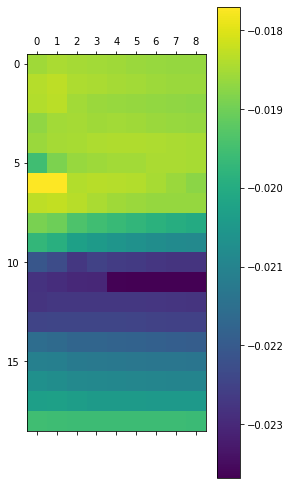

In [131]:
# stack1
extent = [min(hard_threshold_mul), max(hard_threshold_mul), min(bfactors), max(bfactors)]
fig = plt.figure(figsize=(20,30))
plt.matshow(twodscores)
plt.colorbar()
plt.show()

<Figure size 1440x2160 with 0 Axes>

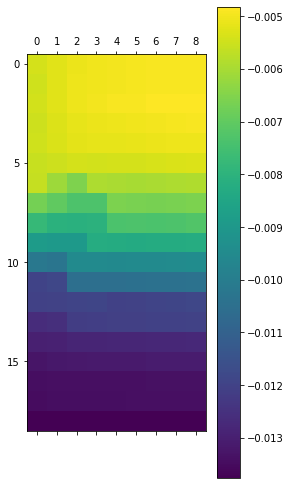

In [134]:
# stack6
extent = [min(hard_threshold_mul), max(hard_threshold_mul), min(bfactors), max(bfactors)]
fig = plt.figure(figsize=(20,30))
plt.matshow(twodscores)
plt.colorbar()
plt.show()

<Figure size 1440x2160 with 0 Axes>

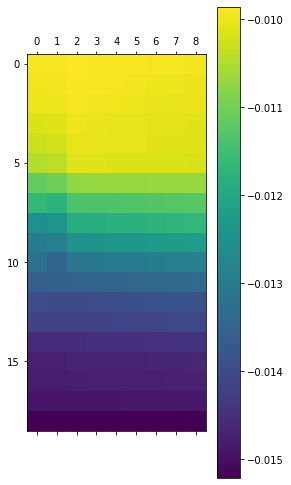

In [137]:
# stack11
extent = [min(hard_threshold_mul), max(hard_threshold_mul), min(bfactors), max(bfactors)]
fig = plt.figure(figsize=(20,30))
plt.matshow(twodscores)
plt.colorbar()
plt.show()

<Figure size 1440x2160 with 0 Axes>

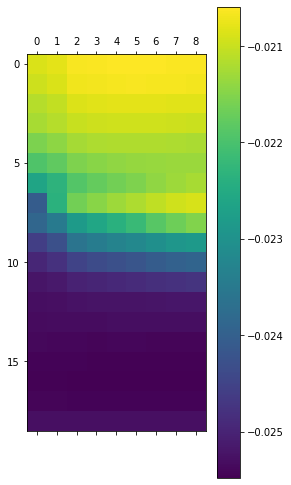

In [140]:
# stack16
extent = [min(hard_threshold_mul), max(hard_threshold_mul), min(bfactors), max(bfactors)]
fig = plt.figure(figsize=(20,30))
plt.matshow(twodscores)
plt.colorbar()
plt.show()

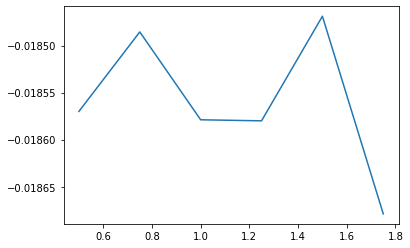

In [35]:
# just the scores over defocus values
# plt.plot(bfactors,defocus)
plt.plot(hard_threshold_mul,scores)
plt.show()

In [70]:
scores=[]
fit=[]
for bfactor in bfactors:
    vals=np.array(list(filter(lambda x: x[1] == float(bfactor), stack_metrics)),dtype='float32')
    means=vals.mean(axis=0)
    scores.append(means[3])
    fit.append(means[4])
#     print(means.T)

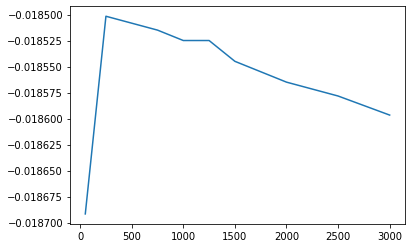

In [71]:
# just the scores over defocus values
# plt.plot(bfactors,defocus)
plt.plot(bfactors,scores)
plt.show()